In [1]:
"Import Libraries"
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\ Drive/Data.zip > /dev/null

In [2]:
"Training_Set and Test_set Directory"
train='/content/content/drive/MyDrive/d/training_set'
test='/content/content/drive/MyDrive/d/testing_data'

In [3]:
import os
train_healthy= '/content/drive/MyDrive/d/training_set/healthy'
train_unhealhy='/content/drive/MyDrive/d/training_set/unhealthy'

In [4]:
"Check number of trainingset data available"
train_healthy=os.listdir(train_healthy)
train_unhealhy=os.listdir(train_unhealhy)
print(len(train_healthy))
print(len(train_unhealhy))

1641
1712


Model Building

In [53]:
"Model Architecture"
model=tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(25,25,3)),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [54]:
"Optimizer"
opt_Adams = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt_Adams, metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
"Data Augmentation with Image Generator"
train_data=ImageDataGenerator(rescale=1/255 , rotation_range = 40,width_shift_range = 0.2,height_shift_range = 0.2,
                              shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True,fill_mode='nearest')
test_data=ImageDataGenerator(rescale=1/255)

In [9]:
train_gen=train_data.flow_from_directory(train, batch_size=100, target_size=(25,25), class_mode='binary')
test_gen= test_data.flow_from_directory(test, batch_size=100, target_size=(25,25), class_mode='binary')

Found 3353 images belonging to 2 classes.
Found 826 images belonging to 2 classes.


In [10]:
"Call back to stop model training at validation accuracy of 90%"
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True
            print("Validation Accuracy reached 90%")


In [55]:
"Model Training"
hist=model.fit(train_gen, steps_per_epoch=34, 
          epochs=15, validation_data=test_gen, validation_steps=9, verbose=2, callbacks = [MyThresholdCallback(threshold=0.90)])

Epoch 1/15
34/34 - 257s - loss: 0.6944 - accuracy: 0.5514 - val_loss: 0.6816 - val_accuracy: 0.5593 - 257s/epoch - 8s/step
Epoch 2/15
34/34 - 253s - loss: 0.6754 - accuracy: 0.5234 - val_loss: 0.6642 - val_accuracy: 0.5097 - 253s/epoch - 7s/step
Epoch 3/15
34/34 - 247s - loss: 0.6616 - accuracy: 0.5100 - val_loss: 0.6501 - val_accuracy: 0.5097 - 247s/epoch - 7s/step
Epoch 4/15
34/34 - 247s - loss: 0.6464 - accuracy: 0.5136 - val_loss: 0.6304 - val_accuracy: 0.5121 - 247s/epoch - 7s/step
Epoch 5/15
34/34 - 246s - loss: 0.6258 - accuracy: 0.5586 - val_loss: 0.5988 - val_accuracy: 0.6877 - 246s/epoch - 7s/step
Epoch 6/15
34/34 - 245s - loss: 0.5890 - accuracy: 0.7632 - val_loss: 0.5404 - val_accuracy: 0.7191 - 245s/epoch - 7s/step
Epoch 7/15
34/34 - 245s - loss: 0.5157 - accuracy: 0.8485 - val_loss: 0.4601 - val_accuracy: 0.8862 - 245s/epoch - 7s/step
Epoch 8/15
34/34 - 246s - loss: 0.4411 - accuracy: 0.9177 - val_loss: 0.3979 - val_accuracy: 0.8801 - 246s/epoch - 7s/step
Epoch 9/15
34/34

Make Predictions

In [64]:
"Directory to Image to be predicted"
m='/content/drive/MyDrive/d/testing_data/test_healthy/healthy.1822.jpg'

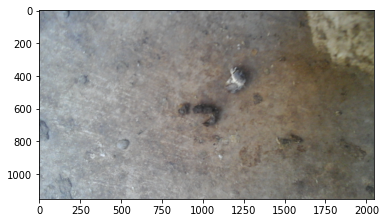

In [65]:
"View the Image"
from keras.preprocessing import image
x=plt.imread(m)
plt.imshow(x)

In [66]:
"Model Prediction"
from keras.preprocessing import image
img=image.load_img(m, target_size=(25,25))
img=image.img_to_array(img)
x=np.expand_dims(img, axis=0)
images = np.vstack([x])
if model.predict(images)[0][0] < 1:
  print("Healthy")
  print(model.predict(images)[0][0])
else:
  print("Unhealthy")
  print(model.predict(images)[0][0])

Unhealthy
1.0
